# Simple Linear Regression

### The Model

This is probably the most basic machine learning model, yet it is still very powerful. It is a supervised machine learning model which just means that it requires data to train on in order to make predictions. The true relationship between X and Y meaning if we have all the data takes on the form:
$$y = \beta_0 + \beta_1x + \epsilon$$
Epsilon is just an irreducible error term. However, we don't have all the data, we have a small sample of data in order to make predictions. So how do we make the best estimate for the coefficients for the linear model?

### RSS

First, we need to understand something called the RSS(residual sum of squares). Residuals are simply the difference between the actual values from the training data set and predicted values given by the linear model. The RSS is the sum of all the residuals squared in the training data set. We square the residuals because we want to figure out how much error there is not if they are negative or positive. Here is the formula for RSS: $$\sum\limits_{i=1}^{n}(y_i - \hat{y})^2$$n is the number of observations in the training data, $y_i$ is the actual value of the observation in the training data, and $\hat{y}$ is the predicted value given by the linear model. We can rewrite it as: $$\sum\limits_{i=1}^{n} (y_i - (\beta_0 + \beta_1x))^2$$ Now, the way we make the estimate of our coefficients is to find the values that minimize the RSS. How do we do this?

### Estimating $\beta_0$,$\beta_1$

To find the estimates for $\beta_0$,$\beta_1$ that minimize the RSS, we're gonna differentiate the RSS with respect to both $\beta_0$,$\beta_1$ and set both derivatives equal to zero and solve for $\beta_0$,$\beta_1$ $$\frac{\partial{RSS}}{\partial{\beta_0}}(\sum\limits_{i=1}^{n} (y_i - (\beta_0 + \beta_1x))^2)$$ $$\frac{\partial{RSS}}{\partial{\beta_1}}(\sum\limits_{i=1}^{n} (y_i - (\beta_0 + \beta_1x))^2)$$Setting these derivatives equal to zero, then solving for $\beta_0$,$\beta_1$, we get:$$\hat{\beta_1} = \frac{\sum\limits_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum\limits_{i=1}^{n}(x_i - \bar{x})^2}$$$$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$$ $\bar{x}$ is the average for the x values of the training data and $\bar{y}$ is the average for the y values of the training data. The hats on $\beta_0$,$\beta_1$ signify that these are estimates that minimize the training RSS.These formulas themselves and doing the differentiation and algebra to get these formulas is not really important. What's most important is understanding how we arrived at these formulas and developing the mathematical intuition behind how simple linear regression works.

### Assessing the fit of the model

Now we want to evaluate how well the model fit the data. We do this with something called the R^2 coefficient. The mathematical formula for this is $$R^2 = \frac{TSS - RSS}{TSS}$$TSS is defined as $\sum\limits_{i=1}^{n}(y_i - \bar{y})^2$. It measures the total variance in the response y. RSS measures the amount of variability left after performing the regression. So $R^2$ measures the proportion of variability in y that can be explained using x. We want a $R^2$ coefficient that is close to 1 because that indicates that a large proportion of variability in y is explained by the regression model. Again, knowing these formulas is not the important part. It's understanding why these formulas make sense and what all these values actually mean in the context of simple linear regression. 

### Assumptions for simple linear regression

So now we're gonna look at an actual dataset and perform simple linear regression on it. However, before we even do that, we need to see if that data is a good candidate for linear regression. To do that, we're gonna see if it satisfies some assumptions/requirements of linear regression. Know these assumptions well because they very often come up in data science interviews. Then I'll go over 6 assumptions of linear regression. Probably have them plot all of these things including linearity, variance of error terms, outliers, and all of it. It will give them practice plotting. For vitamin, I'll ask them How do we estimate coefficients? What does R^2 mean? What are two assumptions for linear regression? For homework, Ill probaly just give them another data set and tell them to check assumptions then just perform linear regression and evaluate how well it does. 

First, we're gonna load in the dataset.

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [60]:
salary = pd.read_csv("/Users/aniketarahane/Downloads/Salary_dataset.csv").drop('Unnamed: 0', axis= 'columns')
salary

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


This dataset has information about salary and years of experience so we are going to see if we can predict salary with years of experience using simple linear regression. The first assumption we are going to check is whether years of experience and salary look like they have an approximately linear relationship.  

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

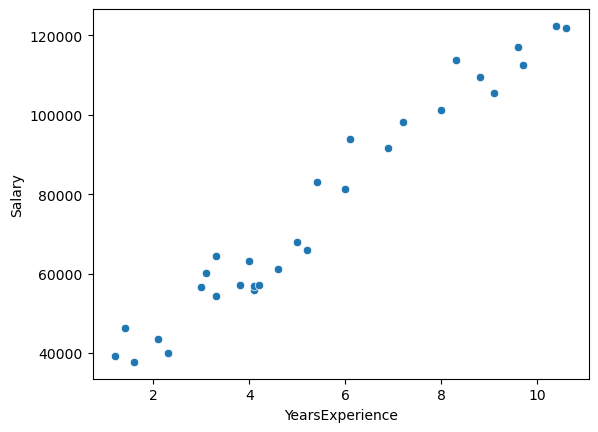

In [61]:
sns.scatterplot(x='YearsExperience', y='Salary', data = salary)

We can see that the scatter plot looks approximately linear.

Next, let's check for outliers which we are going to do using a boxplot. 

/Users/aniketarahane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

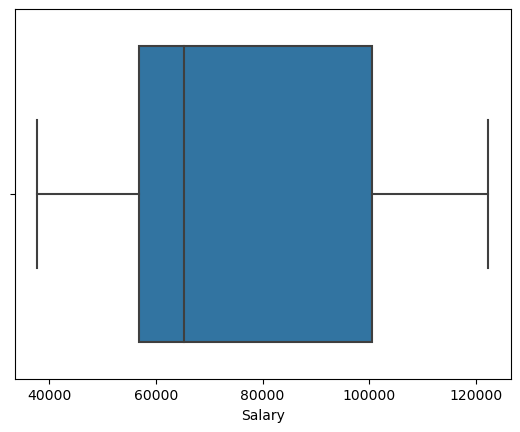

In [62]:
sns.boxplot(salary['Salary'])

There is no outliers as we can see. The next assumption, we are going to look at is high leverage points. This are just points in the training data set where the y values are unusual given x. Looking at the scatter plot we made above, we can see visually that there aren't any high leverage points. 

Now to check the rest of the assumptions, we first need to fit a linear regression model and find the residuals. 

In [72]:
x = np.array(salary['YearsExperience']).reshape(-1, 1)
y = np.array(salary['Salary']).reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_hat = lr.predict(x_train)
res = y_hat - y_train
res

array([[ -6309.73187114],
       [   777.39810829],
       [  8333.70313914],
       [  6720.53623029],
       [  5508.52808773],
       [ -3435.78799178],
       [ -8351.54722413],
       [  1253.9904318 ],
       [  7882.30505826],
       [-10349.88918437],
       [ -3978.5649623 ],
       [  2068.69354352],
       [  -362.92611378],
       [   -63.41724469],
       [  8803.02736121],
       [  4947.78659356],
       [ -8813.24074023],
       [  1897.74006854],
       [  1140.29546265],
       [   433.36117889],
       [ -8102.25993146]])

Now, we're gonna check the other assumptions of linear regression which both have to do with residuals. Residuals should have constant variance and should have no pattern/correlation among terms.

<AxesSubplot:>

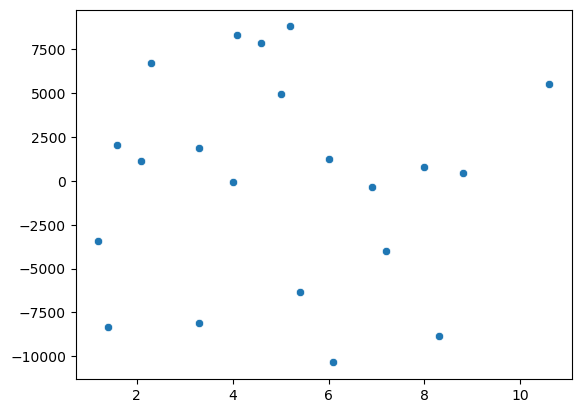

In [80]:
sns.scatterplot(x= x_train.flatten(), y= res.flatten())

We clearly see no pattern/correlation and there is pretty constant variance in the values. 